In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
#Los datos fueron obtenidos de Kraggle: https://www.kaggle.com/mirbektoktogaraev/madrid-real-estate-market

df=pd.read_csv("houses_Madrid.csv")
df1=pd.read_csv("houses_Madrid.csv")

In [3]:
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


# Preprocesamiento

In [4]:
missing_data = df.isnull()

In [5]:
#se revisa si losnams son mayores a los no nulls, es decir ,los que estan True, para borrar las variables.Se quedan las variables true si representan entre un 25% y un 30%
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Unnamed: 0
False    21742
Name: Unnamed: 0, dtype: int64

id
False    21742
Name: id, dtype: int64

title
False    21742
Name: title, dtype: int64

subtitle
False    21742
Name: subtitle, dtype: int64

sq_mt_built
False    21616
True       126
Name: sq_mt_built, dtype: int64

sq_mt_useful
True     13514
False     8228
Name: sq_mt_useful, dtype: int64

n_rooms
False    21742
Name: n_rooms, dtype: int64

n_bathrooms
False    21726
True        16
Name: n_bathrooms, dtype: int64

n_floors
True     20305
False     1437
Name: n_floors, dtype: int64

sq_mt_allotment
True     20310
False     1432
Name: sq_mt_allotment, dtype: int64

latitude
True    21742
Name: latitude, dtype: int64

longitude
True    21742
Name: longitude, dtype: int64

raw_address
False    16277
True      5465
Name: raw_address, dtype: int64

is_exact_address_hidden
False    21742
Name: is_exact_address_hidden, dtype: int64

street_name
False    15837
True      5905
Name: street_name, dtype: int64

street_number
True     15

In [6]:
del df["rent_price_by_area"]
del df['door']
del df['is_rent_price_known']    
del df['operation']
del df['portal']
del df['is_furnished']    
del df['is_kitchen_equipped']
del df['has_private_parking']
del df['has_public_parking']    
del df["Unnamed: 0"]
del df["built_year"]
del df["title"]
del df["neighborhood_id"]
del df["is_buy_price_known"]
del df["are_pets_allowed"]
del df["latitude"]
del df["longitude"]
del df["id"]
del df["is_orientation_north"]
del df["is_orientation_west"]
del df["is_orientation_south"]
del df["is_orientation_east"]
del df["has_green_zones"]
del df["is_accessible"]
del df["has_garden"]
del df["buy_price_by_area"]
del df["rent_price"] #nos interesa predecir el precio de venta mas no el de alquiler
del df["is_floor_under"]# hay otra variable que representa si el inmueble es bajo no, y todos los que son bajos se reprentaban
#en is_floor_under como true
del df["street_number"] #no es relevante
del df["street_name"] #se elimina porque lascalles son particulares para cada patrón
del df["is_exact_address_hidden"]
del df["raw_address"]# se borra porque contiene el street name y el street number los cuales no son relevantes para el estudio
del df["sq_mt_allotment"] #se borra porque tiene un 90% de valores perdidos
del df["sq_mt_useful"] # se elimina porque los valores vacios representan el 60% sobre el total
del df["is_renewal_needed"] #se elimina porque la moyría de de los patrones son false
del df["has_individual_heating"] #se elimina porque ya esta la variable has_central_heating que representa lo contrario a la 
#misma y se puede reemplazar el false como si tubiera calefaccion individual
del df["is_new_development"] #se elimina porque no esta especificado el año de construccion, todos los valores true no tienen 
#el año y los inmuebles con año de construccion de menos de 5 años no están considerados como obra nueva.
del df["parking_price"]
del df["is_parking_included_in_price"]
del df["n_floors"]
#Se eliminaron 16 patrones que no contenían número de baños
df.dropna(subset=['n_bathrooms'])
del df['has_fitted_wardrobes'] #se elimina porque no afectan al precio
del df['energy_certificate']# se elimina porque la mayoría de los pisos no tienen indicado su certificado energético y los que
#tienen no afectan al precio 
del df['is_exterior'] # Se elimina porque la mayoría de los pisos de este data set son exteriores (91% true)
del df['floor'] # Se elimina porque al representar los datos graficamente se observó que los sótanos y los entre plantas tienen 
#mayor precio que los pisos de plantas intermedias, lo cual no tiene sentido

In [7]:
# Se reemplazan los nans con False porque la columa solo tiene los valores true y nans, los cuales representan false
df["has_storage_room"].fillna(False,inplace=True)
df["has_balcony"].fillna(False,inplace=True)
df["has_terrace"].fillna(False,inplace=True)
df["has_pool"].fillna(False,inplace=True)
df["has_ac"].fillna(False,inplace=True)

#He renombrado la columna subtitle por neighborhood. 
df.rename(columns={'subtitle':'neighborhood'}, inplace=True)
df1.rename(columns={'subtitle':'neighborhood'}, inplace=True)

In [8]:
#Se reemplazaron los nans por "Estudio" porque es el unico que no está incluido en "house_type_id" y en su descripción indica que son un Estudio
df["house_type_id"]=df["house_type_id"].replace({"HouseType 1: Pisos":"Pisos","HouseType 2: Casa o chalet":"Casa o Chalet","HouseType 4: Dúplex":"Dúplex","HouseType 5: Áticos":"Áticos"})

df["house_type_id"].fillna("Estudio",inplace=True)

In [9]:
df1["house_type_id"]=df1["house_type_id"].replace({"HouseType 1: Pisos":"Pisos","HouseType 2: Casa o chalet":"Casa o Chalet","HouseType 4: Dúplex":"Dúplex","HouseType 5: Áticos":"Áticos"})

df1["house_type_id"].fillna("Estudio",inplace=True)

In [12]:
df_cat=df[["neighborhood","house_type_id","has_ac","has_pool","has_terrace","has_balcony","has_storage_room","has_parking"]]

In [13]:
for i in df_cat.columns:
    keys=df_cat[i].unique()
    values=range(len(keys))
    dictionary=dict(zip(keys,values))
    df_cat[i]=df_cat[i].replace(dictionary)

C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
df=df.drop(df_cat, axis=1)
df_1= pd.concat([df, df_cat], sort=False, axis=1)
df_1

,sq_mt_built,n_rooms,n_bathrooms,buy_price,has_central_heating,has_lift,neighborhood,house_type_id,has_ac,has_pool,has_terrace,has_balcony,has_storage_room,has_parking
0,64.0,2,1.0,85000,NaN,False,0,0,0,0,0,0,0,0
1,70.0,3,1.0,129900,NaN,True,1,0,1,0,1,0,0,0
2,94.0,2,2.0,144247,False,True,2,0,1,0,0,0,1,0
3,64.0,2,1.0,109900,NaN,True,2,0,1,0,0,0,1,0
4,108.0,2,2.0,260000,NaN,True,3,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,78.0,2,2.0,350000,False,True,143,3,0,0,0,0,1,1
21738,96.0,2,2.0,425000,False,True,143,0,0,1,0,0,1,1
21739,175.0,4,2.0,680000,False,False,143,0,0,1,1,0,1,1
21740,289.0,4,3.0,695000,NaN,NaN,144,4,0,0,1,1,1,1


# Imputacion

In [15]:
#Se ha creado un nuevo dataframe con los atributos booleanos que tienen NaNs para importarlos
df["has_central_heating"]=df["has_central_heating"].replace({True:1,False:0})
df["has_lift"]=df["has_lift"].replace({True:1,False:0})

In [17]:
df_num=df[["has_central_heating","has_lift"]]

df_1=df_1.drop(df_num, axis=1)

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0)
imputer.fit(df_num)
df_num_imp = imputer.transform(df_num)
df_num = pd.DataFrame(df_num_imp, columns = df_num.columns)
df_num=df_num.round()

In [19]:
for i in df_1:
    print(df_1[i].value_counts())

70.0     494
60.0     484
80.0     427
65.0     377
90.0     357
        ... 
628.0      1
881.0      1
619.0      1
438.0      1
775.0      1
Name: sq_mt_built, Length: 678, dtype: int64
3     7214
2     5499
4     3367
1     2267
5     1757
6      715
0      439
7      259
8      112
9       54
10      26
11      10
12       9
13       6
24       3
15       2
14       1
18       1
16       1
Name: n_rooms, dtype: int64
1.0     9084
2.0     7408
3.0     2429
4.0     1170
5.0      871
6.0      422
7.0      182
8.0       94
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
15.0       1
16.0       1
12.0       1
Name: n_bathrooms, dtype: int64
550000     170
135000     149
650000     146
130000     139
160000     138
          ... 
682500       1
688649       1
289300       1
1215000      1
106500       1
Name: buy_price, Length: 2403, dtype: int64
104    851
46     771
87     583
125    552
80     503
      ... 
143      7
144      6
141      5
145      4
64       2
Name:

In [20]:
df_1= pd.concat([df_1, df_num], sort=False, axis=1)

In [21]:
df_1

,sq_mt_built,n_rooms,n_bathrooms,buy_price,neighborhood,house_type_id,has_ac,has_pool,has_terrace,has_balcony,has_storage_room,has_parking,has_central_heating,has_lift
0,64.0,2,1.0,85000,0,0,0,0,0,0,0,0,0.0,0.0
1,70.0,3,1.0,129900,1,0,1,0,1,0,0,0,0.0,1.0
2,94.0,2,2.0,144247,2,0,1,0,0,0,1,0,0.0,1.0
3,64.0,2,1.0,109900,2,0,1,0,0,0,1,0,0.0,1.0
4,108.0,2,2.0,260000,3,0,0,1,0,0,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,78.0,2,2.0,350000,143,3,0,0,0,0,1,1,0.0,1.0
21738,96.0,2,2.0,425000,143,0,0,1,0,0,1,1,0.0,1.0
21739,175.0,4,2.0,680000,143,0,0,1,1,0,1,1,0.0,0.0
21740,289.0,4,3.0,695000,144,4,0,0,1,1,1,1,0.0,1.0


In [22]:
df_1.isnull().sum(axis = 0)

sq_mt_built            126
n_rooms                  0
n_bathrooms             16
buy_price                0
neighborhood             0
house_type_id            0
has_ac                   0
has_pool                 0
has_terrace              0
has_balcony              0
has_storage_room         0
has_parking              0
has_central_heating      0
has_lift                 0
dtype: int64

In [23]:
df_1=df_1.dropna()

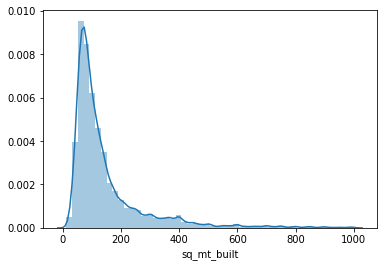

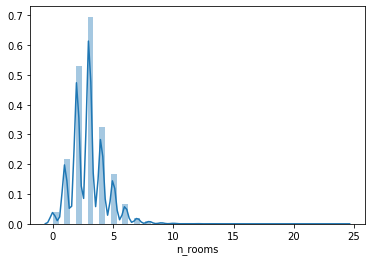

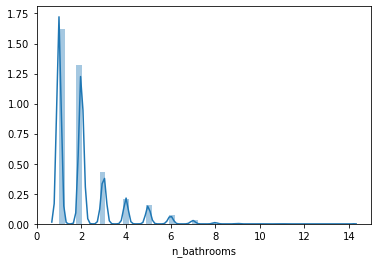

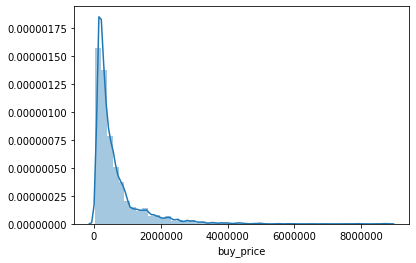

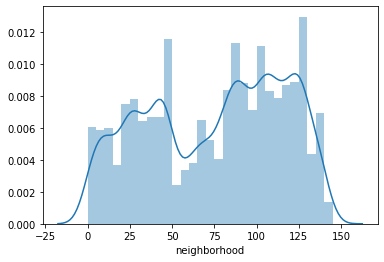

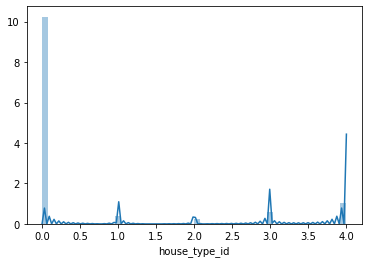

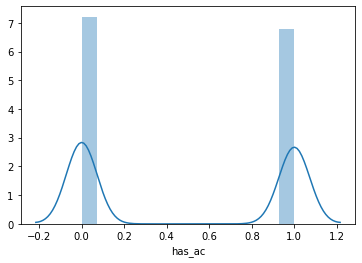

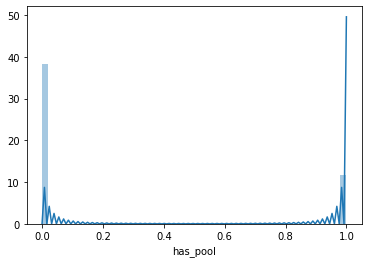

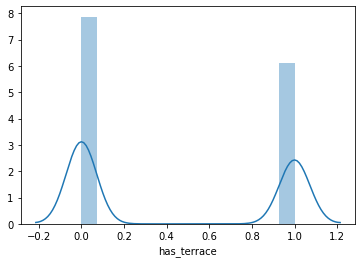

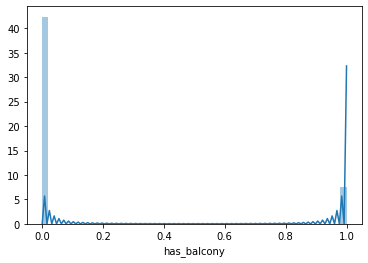

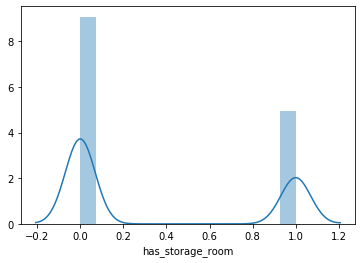

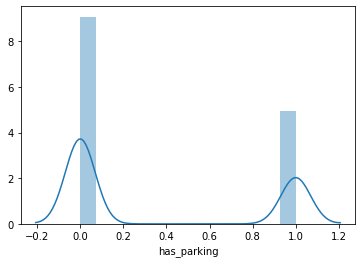

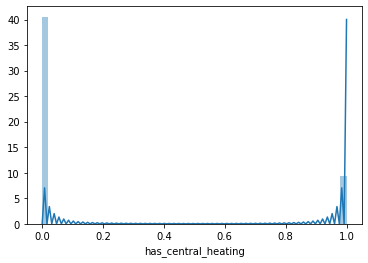

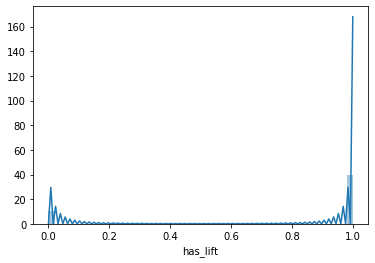

In [25]:
import matplotlib.pyplot as plt

for i in df_1.columns:
    plt.subplots(1)
    sns.distplot(df_1[i])

Regresíon Lineal Múltiple

In [32]:
reg = np.random.rand(len(df_1)) < 0.8
train = df_1[reg]
test = df_1[~reg]

from sklearn import linear_model
regr = linear_model.LinearRegression()
xtrain = np.asanyarray(train[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
ytrain = np.asanyarray(train[['buy_price']])
xtest = np.asanyarray(test[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
ytest = np.asanyarray(test[['buy_price']])
regr.fit (xtrain, ytrain)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Regression Intercept:', regr.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

y_hat= regr.predict(xtest)
#print(mean_squared_error(ytest, y_hat)) 
print(r2_score(ytest, y_hat)) #MAXIMIZAR
print("Mean absolute error: %.2f" % np.mean(np.absolute(ytest, y_hat)))

Coefficients:  [[   4347.18850768  -42434.25647278  110157.17278381    2021.7056347
   -63320.65671551  -29874.97005395 -131134.15441114  -23188.75929836
    37769.99614971   36818.74656016   16746.53296437   31250.69063593
    85058.31182994]]
Regression Intercept: [-260987.82276494]
0.7478521042323583
Mean absolute error: 625079.09


Regresíon con Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

reg = np.random.rand(len(df_1)) < 0.8
train = df_1[reg]
test = df_1[~reg]

regr = DecisionTreeRegressor(max_depth=6) #Arbol de decisión
xtrain = np.asanyarray(train[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
ytrain = np.asanyarray(train[['buy_price']])
xtest = np.asanyarray(test[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
ytest = np.asanyarray(test[['buy_price']])
regr.fit (xtrain, ytrain)

from sklearn.metrics import mean_squared_error, r2_score

y_hat= regr.predict(xtest)
#print(mean_squared_error(ytest, y_hat)) 
print(r2_score(ytest, y_hat)) #MAXIMIZAR

0.8127113692057684


Regresión con Árbol de decisión con leave one out

In [34]:
from sklearn.model_selection import LeaveOneOut

X = np.asanyarray(df_1[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
y = np.asanyarray(df_1[['buy_price']])

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = DecisionTreeRegressor(max_depth=6) #Arbol de decisión
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)
print(r2_score(y, yhat)) #MAXIMIZAR

0.8217904036034186


# Feature Selection

In [48]:
X = np.asanyarray(df_1[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']])
y = np.asanyarray(df_1[['buy_price']])

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True  True  True  True  True
  True]
[1 1 1 2 1 1 1 1 1 1 1 1 1]


C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
df_1.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price', 'neighborhood',
       'house_type_id', 'has_ac', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'has_parking', 'has_central_heating', 'has_lift'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
nof_list=np.arange(1,14)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Optimum number of features: 13
Score with 13 features: 0.731703


C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

# Lasso: SelectFromModel

In [52]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_)

C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stephanie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 1095975.754177
Best score using built-in LassoCV: 0.711079


In [53]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

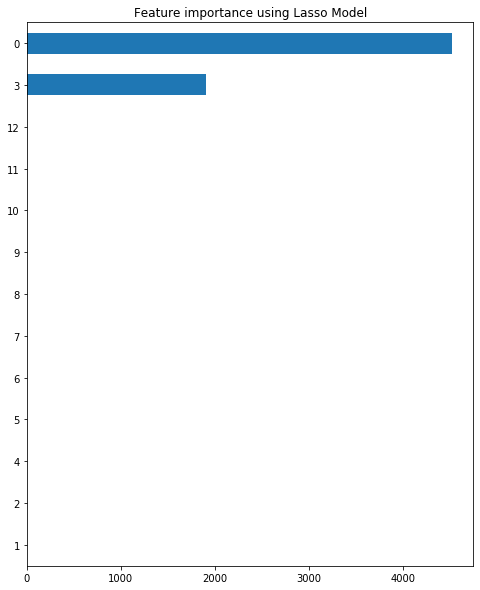

In [54]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [55]:
df_1.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price', 'neighborhood',
       'house_type_id', 'has_ac', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'has_parking', 'has_central_heating', 'has_lift'],
      dtype='object')

# Data Visualization

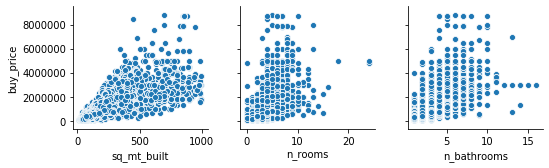

In [57]:
sns.pairplot(data=df, x_vars=['sq_mt_built', 'n_rooms', 'n_bathrooms'], y_vars=["buy_price"])

Estas gráficas reflejan la correlacion que hay de las variables sq_mt_built, n_rooms, n_bathrooms con buyprice. 

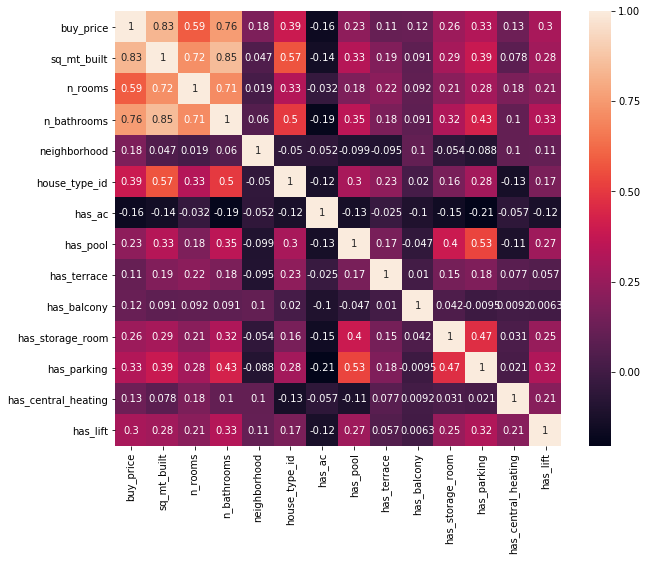

In [59]:
dfcalor = df_1.loc[:,['buy_price','sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room','has_parking', 'has_central_heating', 'has_lift']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfcalor, annot=True)

Se puede observar desde el mapa de calor las siguientes corrrelaciones:
-buy_price y sq_mt_built con 0.83
-buy_price y n_rooms con 0.59
-buy_price y n_bathrooms con 0.76
-sq_mt_built y n_rooms con 0.72.
-n_bathrooms y sq_mt_built con 0.85 

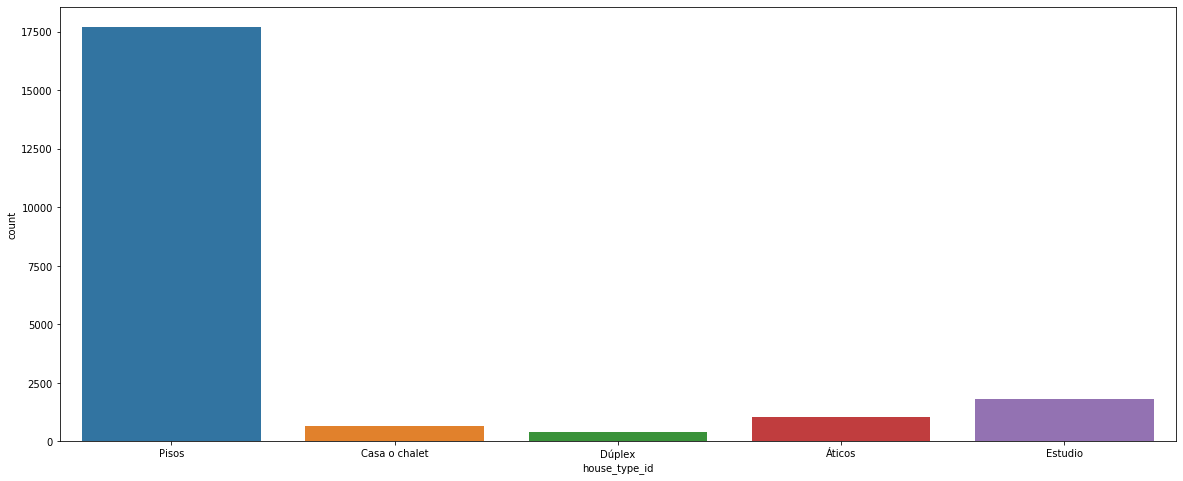

In [60]:
#Gráfico del tipo de vivienda más ofertada en Madrid

fig, ax = plt.subplots(figsize=(20,8))
g_1=sns.countplot(df_1['house_type_id'] ,data=df_1)
g_1=g_1.set_xticklabels(['Pisos','Casa o chalet','Dúplex','Áticos','Estudio'])

Se puede observar que el tipo de vivienda mas común en Madrid son los pisos. 

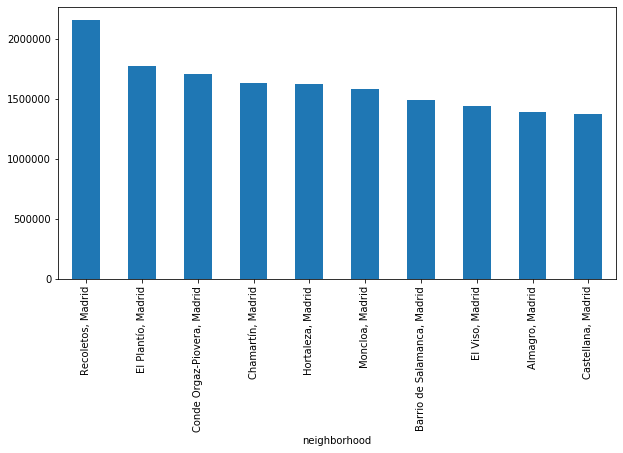

In [61]:
#Viviendas más caras por Barrio
b=df1.groupby("neighborhood")["buy_price"].mean()
fig, ax = plt.subplots(figsize=(10,5))
b.sort_values(axis=0, ascending=False, inplace=False).iloc[0:10].plot(x ='neighborhood', y='buy_price', kind = 'bar')

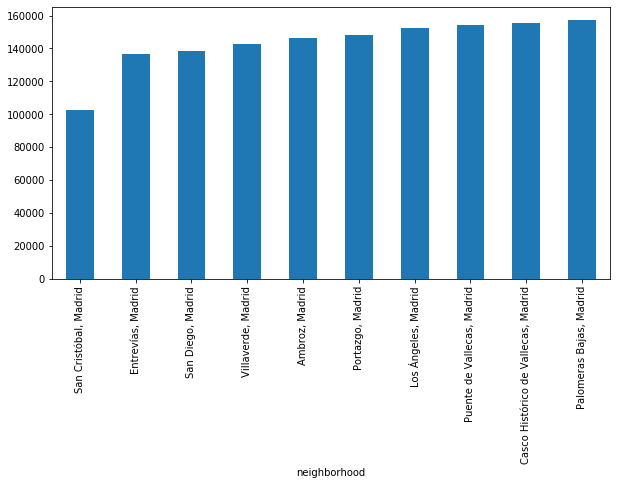

In [62]:
#Viviendas más baratas por barrio
a=df1.groupby("neighborhood")["buy_price"].mean()
fig, ax = plt.subplots(figsize=(10,5))
a.sort_values(axis=0, ascending=True, inplace=False).iloc[0:10].plot(x ='neighborhood', y='buy_price', kind = 'bar')

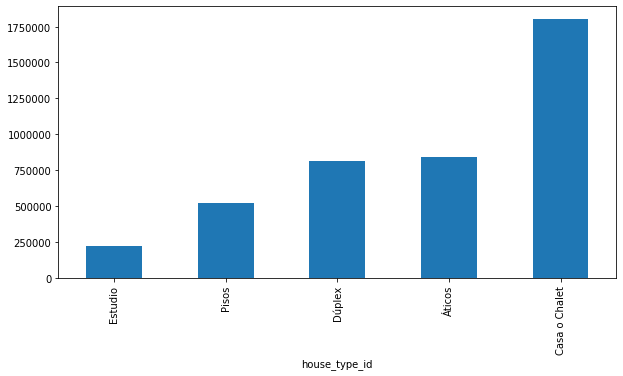

In [63]:
# Precios por tipo de vivienda
c=df1.groupby("house_type_id")["buy_price"].mean()
fig, ax = plt.subplots(figsize=(10,5))
c.sort_values(axis=0, ascending=True, inplace=False).iloc[0:10].plot(x ='neighborhood', y='buy_price', kind = 'bar')

El tipo de vivienda más cara son las Casas o Chalet y el más barato son los estudios.

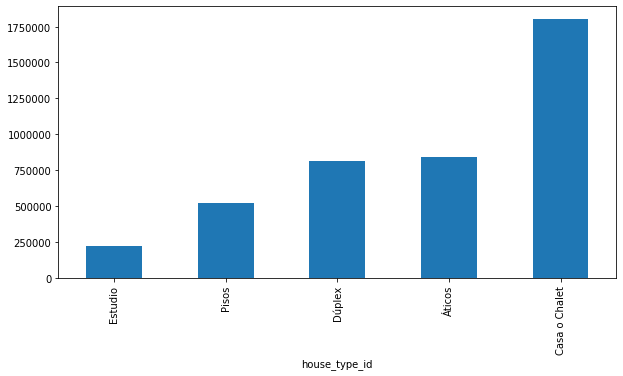

In [64]:
cd=df1.groupby("house_type_id")["buy_price"].mean()
fig, ax = plt.subplots(figsize=(10,5))
c.sort_values(axis=0, ascending=True, inplace=False).iloc[0:10].plot(x ='neighborhood', y='buy_price', kind = 'bar')

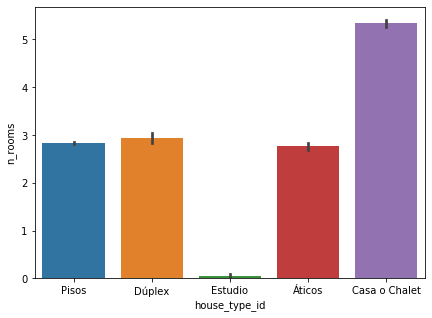

In [66]:
#Gráfica del tipo de vivienda con respecto al numero de habitaciones
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x='house_type_id', y='n_rooms',data=df1)

En promedio, los pisos, dúplex y áticos tienen 3 pisos, por o que refleja que las viviendas con 3 habitaciones son las mas demandadas en el mercado inmobiliario.

(0, 4000000)

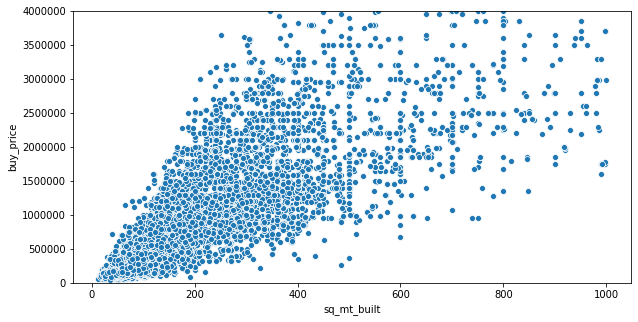

In [67]:
#Gráfica de metro cuadrado por precio

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot("sq_mt_built","buy_price", data=df_1)
plt.ylim(0, 4000000)

Se puede observar que mientras haya mayor cantidad mts2, mayor es el precio.

# Inferencia estadistica

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [72]:
n = ols('buy_price ~ sq_mt_built+n_rooms+n_bathrooms+neighborhood+house_type_id+has_ac+has_pool+has_terrace+has_balcony+has_storage_room+has_parking+has_central_heating+has_lift',df_1).fit()
print (n.summary())

                            OLS Regression Results                            
Dep. Variable:              buy_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4675.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        16:33:55   Log-Likelihood:            -3.0818e+05
No. Observations:               21600   AIC:                         6.164e+05
Df Residuals:                   21586   BIC:                         6.165e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.578e+05   9

Se puede observar que el R2 de 0.73 refleja que el modelo explica altamente la variablidad de los datos de respuesta en torno a su media. 
Con respecto al F-statistic, se observa que es muy alto, por lo que demuestra que hay gran evidencia contra la hipótesis nula.
Con respecto a los p-value de las variables, en su mayoría son menores al nivel significativo de 0.05, exepto has_parking.
El resumen de los resultados de la la regresión OLS es importante para verificar la precisión del modelo de la regresion lineal y datos que son utilizados para la estimación y predicción.

In [73]:
#Excluyendo has_parking  se obtiene lo siguiente:
from sklearn.model_selection import LeaveOneOut

X = np.asanyarray(df_1[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room', 'has_central_heating', 'has_lift']])
y = np.asanyarray(df_1[['buy_price']])

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = DecisionTreeRegressor(max_depth=6) #Arbol de decisión
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)
print(r2_score(y, yhat)) #MAXIMIZAR

0.8237848714546555


In [98]:
#Excluyendo has_parking  se obtiene lo siguiente:
from sklearn.model_selection import LeaveOneOut

X = np.asanyarray(df_1[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'neighborhood','house_type_id', 'has_ac', 'has_central_heating', 'has_lift']])
y = np.asanyarray(df_1[['buy_price']])

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = DecisionTreeRegressor(max_depth=6) #Arbol de decisión
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)
print(r2_score(y, yhat)) #MAXIMIZAR

0.8218451065550686


Se buscara predecir el precio d euna vivienda en base a las siguientes características:
sq_mt_built: 240 mts2
n_rooms:2 
n_bathrooms:2 
neighborhood:Retiro
house_type_id:Casa o Chalet
has_ac:no
has_pool:no
has_terrace: no
has_balcony: no
has_storage_room:no
has_central_heating:no
has_lift:si

In [96]:
df1["neighborhood"].unique()[30]

'Retiro, Madrid'

In [97]:
buy_price=[[240,2,2,30,2,1,0,0,0,0,1,1]]
yhat1 = clf.predict(np.array(buy_price))
yhat1

array([1155437.49375])

#El precio de la vivienda con las carácterísticas nombradas anteriormente va a ser de 1155437.49375 euros.